Импортируем необходимые библиотеки

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors

Загружаем датасет в датафрейм

In [46]:
df = pd.read_csv('data/Physical_Activity_Monitoring_unlabeled.csv')

Посмотрим на данные в разных разрезах

In [47]:
df.head(10)

,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,252.75,34.8750,0.902847,7.45872,6.032490,1.006100,7.44575,6.303650,-0.021952,0.004114,...,-0.025606,0.030239,-14.5447,27.33360,-5.76620,0.206416,0.348212,0.763201,-0.503652,5
1,3652.45,29.7500,-4.069330,3.76168,8.279720,-5.972500,3.22273,6.908970,0.116054,-0.375968,...,-0.670163,1.786200,-32.8257,-15.77190,-1.31395,0.578332,-0.566734,0.405888,-0.423791,2
2,504.76,34.3750,-2.007540,-9.60180,0.773674,-1.803500,-9.58937,1.073680,0.020131,0.042189,...,-0.009741,-0.006579,-18.8171,16.30890,25.29280,0.139776,0.676586,0.393796,0.606316,8
3,2801.61,31.9375,-13.262200,5.85443,0.899334,-13.611500,5.91511,0.840377,1.715630,-0.050492,...,-0.163470,-3.495570,-26.7418,34.35660,21.32740,0.416303,0.783387,0.306464,0.345075,2
4,441.01,33.5000,-0.013940,8.66540,4.398210,0.144153,8.56816,4.822200,-0.006938,-0.007383,...,-0.028172,-0.003737,-17.7798,-3.99810,10.99500,0.171133,-0.748343,0.252988,-0.588807,6
5,2407.75,32.2500,-11.248600,4.70549,1.472190,-10.437400,4.45819,1.595360,1.376280,1.629110,...,0.395789,-0.734158,-37.2300,-17.66060,25.97660,0.081638,-0.564666,-0.465628,-0.676519,6
6,288.18,33.8125,-9.003480,3.48025,2.202730,-8.781060,3.45025,2.426420,0.291490,-0.142762,...,0.009919,0.016218,-61.3576,-33.90920,-13.77570,0.542814,-0.366369,0.626705,-0.422336,2
7,2926.96,31.8125,-1.183270,4.29157,6.435280,-1.338840,5.22864,7.488770,-0.100648,0.209315,...,0.057945,0.394188,-63.8337,14.46170,14.48690,1.000000,0.000000,0.000000,0.000000,1
8,738.33,34.5625,-8.875780,-5.29485,1.156600,-8.606980,-5.44707,1.569890,-0.276623,-0.353238,...,0.016960,-0.009354,-37.2116,-2.25659,10.92460,0.146531,-0.810946,0.130713,-0.551189,8
9,2934.54,31.7500,-6.033980,6.36204,8.818830,-2.939410,6.99344,8.966410,0.124129,-0.301420,...,0.179439,-1.369650,-60.5519,-36.30930,-1.18247,1.000000,0.000000,0.000000,0.000000,1


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534601 entries, 0 to 534600
Data columns (total 53 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   timestamp          534601 non-null  float64
 1   handTemperature    530560 non-null  float64
 2   handAcc16_1        530560 non-null  float64
 3   handAcc16_2        530560 non-null  float64
 4   handAcc16_3        530560 non-null  float64
 5   handAcc6_1         530560 non-null  float64
 6   handAcc6_2         530560 non-null  float64
 7   handAcc6_3         530560 non-null  float64
 8   handGyro1          530560 non-null  float64
 9   handGyro2          530560 non-null  float64
 10  handGyro3          530560 non-null  float64
 11  handMagne1         530560 non-null  float64
 12  handMagne2         530560 non-null  float64
 13  handMagne3         530560 non-null  float64
 14  handOrientation1   530560 non-null  float64
 15  handOrientation2   530560 non-null  float64
 16  ha

In [49]:
df.describe()

,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
count,534601.000000,530560.000000,530560.000000,530560.000000,530560.000000,530560.000000,530560.000000,530560.000000,530560.000000,530560.000000,...,532055.000000,532055.000000,532055.000000,532055.000000,532055.000000,532055.000000,532055.000000,532055.000000,532055.000000,534601.000000
mean,1593.538159,32.451221,-4.435286,3.241949,4.079375,-4.375896,3.218250,4.262513,-0.008852,0.028801,...,-0.031911,0.002304,-28.756284,2.115624,14.723345,0.360159,-0.091093,0.303517,-0.173845,4.558615
std,1243.906483,1.754847,7.062004,7.224031,3.831257,7.068961,6.864782,3.822053,1.160112,0.926832,...,0.618840,2.036102,19.303887,22.253170,17.907491,0.301254,0.559400,0.344271,0.466304,2.318076
min,37.660000,27.500000,-114.755000,-82.550900,-73.949700,-61.214700,-61.824200,-61.577100,-19.690500,-7.609010,...,-7.701040,-14.019600,-172.865000,-136.951000,-102.716000,0.000003,-0.954848,-0.876838,-0.997040,1.000000
25%,475.500000,31.312500,-9.076360,0.682775,1.588777,-8.981072,0.687587,1.780160,-0.153182,-0.083315,...,-0.049003,-0.221911,-39.689950,-10.960850,2.252230,0.145023,-0.676392,0.006839,-0.580040,2.000000
50%,827.610000,32.875000,-5.465610,3.089205,4.157125,-5.434845,3.127145,4.413625,-0.004439,0.004013,...,-0.004481,0.000354,-26.285600,-0.014372,16.599500,0.240996,0.000000,0.322698,-0.281681,5.000000
75%,2876.990000,33.812500,0.383679,5.559742,6.864212,0.424770,5.592180,7.148178,0.130310,0.094342,...,0.048972,0.032649,-14.549500,19.245900,25.947100,0.501671,0.410052,0.594198,0.252247,7.000000
max,4007.730000,35.250000,60.912600,155.532000,78.480100,34.159400,62.259800,60.843700,22.960000,11.862600,...,6.002540,14.482700,41.764800,92.867000,122.521000,1.000000,0.959538,0.920506,0.996105,8.000000


Можем сделать некоторые выводы:

1) Есть 53 признака и все они представлены в числовом формате
2) Есть целочисленный признак `subject_id`, который показывает конкретный субъект наблюдей
3) В данных присутствуют пропуски, но их количество невелико, по сравнению с размером датасета
4) По названию признаков видно, к какому датчику они относятся и соответственно возможность их группировки


Для начала посмотрим как данные распределены между различными субъектами наблюдений.

In [50]:
uniq_subject = df['subject_id'].value_counts()

print(uniq_subject)

subject_id
5    76793
8    73047
6    70240
1    69882
2    68740
4    63740
7    62115
3    50044
Name: count, dtype: int64


Видим, что в датасете представлены данные по 8 субъектам.
Данные распределены неравномерно, но по всем субъектам присутствует достаточное количество сэмплов.

Так как каждый субъект может обладать индивидуальными физическими особенностями, пропуски заполним средним значением для каждого конкретного субъекта.

In [51]:
# собираем в список колонки с пропусками
cols_with_nan = df.columns[df.isna().any()].tolist()

# для каждой колонки с пропусками
for col in cols_with_nan:
    # группируем по субъекту
    df[col] = df.groupby('subject_id')[col].transform(
        # и заполняем пропуски средним для него значением
        lambda x: x.fillna(x.mean())
    )

# проверим результат
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534601 entries, 0 to 534600
Data columns (total 53 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   timestamp          534601 non-null  float64
 1   handTemperature    534601 non-null  float64
 2   handAcc16_1        534601 non-null  float64
 3   handAcc16_2        534601 non-null  float64
 4   handAcc16_3        534601 non-null  float64
 5   handAcc6_1         534601 non-null  float64
 6   handAcc6_2         534601 non-null  float64
 7   handAcc6_3         534601 non-null  float64
 8   handGyro1          534601 non-null  float64
 9   handGyro2          534601 non-null  float64
 10  handGyro3          534601 non-null  float64
 11  handMagne1         534601 non-null  float64
 12  handMagne2         534601 non-null  float64
 13  handMagne3         534601 non-null  float64
 14  handOrientation1   534601 non-null  float64
 15  handOrientation2   534601 non-null  float64
 16  ha

Итак у нас не осталось пропусков и все столбцы числовые.

Перейдем к группировке признаков. 
Для показаний каждого датчика посчитаем длину вектора изменений. Длина вектора будет в полной мере характеризовать изменение во всех измерениях.

In [52]:
# создаем новые признаки и сразу заполняем их значением длины соответствующего вектора
df['handAcc16'] = (df['handAcc16_1']**2 + df['handAcc16_2']**2 + df['handAcc16_3']**2)**0.5
df['handAcc6'] = (df['handAcc6_1']**2 + df['handAcc6_2']**2 + df['handAcc6_3']**2)**0.5
df['handGyro'] = (df['handGyro1']**2 + df['handGyro2']**2 + df['handGyro3']**2)**0.5
df['handMagne'] = (df['handMagne1']**2 + df['handMagne2']**2 + df['handMagne3']**2)**0.5
df['handOrientation'] = (df['handOrientation1']**2 + df['handOrientation2']**2 + df['handOrientation3']**2 + df['handOrientation4']**2 + df['handTemperature']**2)**0.5
df['chestAcc16'] = (df['chestAcc16_1']**2 + df['chestAcc16_2']**2 + df['chestAcc16_3']**2)**0.5
df['chestAcc6'] = (df['chestAcc6_1']**2 + df['chestAcc6_2']**2 + df['chestAcc6_3']**2)**0.5
df['chestGyro'] = (df['chestGyro1']**2 + df['chestGyro2']**2 + df['chestGyro3']**2)**0.5
df['chestMagne'] = (df['chestMagne1']**2 + df['chestMagne2']**2 + df['chestMagne3']**2)**0.5
df['chestOrientation'] = (df['chestOrientation1']**2 + df['chestOrientation2']**2 + df['chestOrientation3']**2 + df['chestOrientation4']**2 + df['chestTemperature']**2)**0.5
df['ankleAcc16'] = (df['ankleAcc16_1']**2 + df['ankleAcc16_2']**2 + df['ankleAcc16_3']**2)**0.5
df['ankleAcc6'] = (df['ankleAcc6_1']**2 + df['ankleAcc6_2']**2 + df['ankleAcc6_3']**2)**0.5
df['ankleGyro'] = (df['ankleGyro1']**2 + df['ankleGyro2']**2 + df['ankleGyro3']**2)**0.5
df['ankleMagne'] = (df['ankleMagne1']**2 + df['ankleMagne2']**2 + df['ankleMagne3']**2)**0.5
df['ankleOrientation'] = (df['ankleOrientation1']**2 + df['ankleOrientation2']**2 + df['ankleOrientation3']**2 + df['ankleOrientation4']**2 + df['ankleTemperature']**2)**0.5

# удаляем признаки, учтенные в длинах векторов
df = df.drop(
    columns = [
        'handAcc16_1','handAcc16_2','handAcc16_3','handAcc6_1','handAcc6_2','handAcc6_3',
        'handGyro1','handGyro2','handGyro3','handMagne1','handMagne2','handMagne3',
        'handOrientation1','handOrientation2','handOrientation3', 'handOrientation4', 'handTemperature',
        'chestAcc16_1','chestAcc16_2','chestAcc16_3','chestAcc6_1','chestAcc6_2','chestAcc6_3',
        'chestGyro1','chestGyro2','chestGyro3','chestMagne1','chestMagne2','chestMagne3',
        'chestOrientation1','chestOrientation2','chestOrientation3', 'chestOrientation4', 'chestTemperature',
        'ankleAcc16_1','ankleAcc16_2','ankleAcc16_3','ankleAcc6_1','ankleAcc6_2','ankleAcc6_3',
        'ankleGyro1','ankleGyro2','ankleGyro3','ankleMagne1','ankleMagne2','ankleMagne3',
        'ankleOrientation1','ankleOrientation2','ankleOrientation3', 'ankleOrientation4', 'ankleTemperature'
    ]
)

# смотрим результат
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534601 entries, 0 to 534600
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         534601 non-null  float64
 1   subject_id        534601 non-null  int64  
 2   handAcc16         534601 non-null  float64
 3   handAcc6          534601 non-null  float64
 4   handGyro          534601 non-null  float64
 5   handMagne         534601 non-null  float64
 6   handOrientation   534601 non-null  float64
 7   chestAcc16        534601 non-null  float64
 8   chestAcc6         534601 non-null  float64
 9   chestGyro         534601 non-null  float64
 10  chestMagne        534601 non-null  float64
 11  chestOrientation  534601 non-null  float64
 12  ankleAcc16        534601 non-null  float64
 13  ankleAcc6         534601 non-null  float64
 14  ankleGyro         534601 non-null  float64
 15  ankleMagne        534601 non-null  float64
 16  ankleOrientation  53

У нас осталось 17 признаков, один из которых - идентификатор субъекта.
Проверим оставшиеся признаки на мультиколлинеарность и отберем по одному из тех, что коррелируют больше чм на 90%

In [53]:
# для проверки берем все признаки за исключением идентификатора субъекта
corr_features = df.drop(columns=['subject_id'])
# строим матрицу корреляций
corr_matrix = corr_features.corr()

# порог отсечения корреляции
threshold = 0.9
# здесь соберем признаки для удаления
to_drop = set()

# итерируемся по столбцам
for i, col1 in enumerate(corr_features.columns):
    for j, col2 in enumerate(corr_features.columns):
        # если коэффициент корреляции для этой пары больше порога
        if i < j and abs(corr_matrix.iloc[i, j]) > threshold:
            # выводим в консоль пару
            print(f'pair: 1={col1} and 2={col2} corr={abs(corr_matrix.iloc[i, j])}')
            # добавляем столбец в коллекцию на удаление
            to_drop.add(col2)

# выводим в консоль признаки, отобранные для удаления
print(to_drop)

pair: 1=handAcc16 and 2=handAcc6 corr=0.9500459871240313
pair: 1=chestAcc16 and 2=chestAcc6 corr=0.9678138201792492
{'handAcc6', 'chestAcc6'}


У нас оказалось две пары кеоррелирующих признаков и по одному из каждой пары добавлены в список на удаление

In [54]:
# удаляем признаки
df_cleared = df.drop(columns=to_drop)
# смотрим результат
df_cleared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534601 entries, 0 to 534600
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         534601 non-null  float64
 1   subject_id        534601 non-null  int64  
 2   handAcc16         534601 non-null  float64
 3   handGyro          534601 non-null  float64
 4   handMagne         534601 non-null  float64
 5   handOrientation   534601 non-null  float64
 6   chestAcc16        534601 non-null  float64
 7   chestGyro         534601 non-null  float64
 8   chestMagne        534601 non-null  float64
 9   chestOrientation  534601 non-null  float64
 10  ankleAcc16        534601 non-null  float64
 11  ankleAcc6         534601 non-null  float64
 12  ankleGyro         534601 non-null  float64
 13  ankleMagne        534601 non-null  float64
 14  ankleOrientation  534601 non-null  float64
dtypes: float64(14), int64(1)
memory usage: 61.2 MB


Итак осталось 15 признаков.

Для сравнения моделей отберем 20% данных, сохранив соотношение количества сэмплов между субъектами

In [55]:
# выбираем 20% случайных объектов
crop = df_cleared.groupby('subject_id').apply(lambda x: x.sample(frac=0.2, random_state=42)).reset_index(drop=True)

# проверим распределение между субъектами
crop['subject_id'].value_counts()

C:\Users\dimac\AppData\Local\Temp\ipykernel_19880\256801598.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  crop = df_cleared.groupby('subject_id').apply(lambda x: x.sample(frac=0.2, random_state=42)).reset_index(drop=True)


subject_id
5    15359
8    14609
6    14048
1    13976
2    13748
4    12748
7    12423
3    10009
Name: count, dtype: int64

Видим, что примерное соотношение сохранилось.
Посмотрим на выборку

In [56]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106920 entries, 0 to 106919
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         106920 non-null  float64
 1   subject_id        106920 non-null  int64  
 2   handAcc16         106920 non-null  float64
 3   handGyro          106920 non-null  float64
 4   handMagne         106920 non-null  float64
 5   handOrientation   106920 non-null  float64
 6   chestAcc16        106920 non-null  float64
 7   chestGyro         106920 non-null  float64
 8   chestMagne        106920 non-null  float64
 9   chestOrientation  106920 non-null  float64
 10  ankleAcc16        106920 non-null  float64
 11  ankleAcc6         106920 non-null  float64
 12  ankleGyro         106920 non-null  float64
 13  ankleMagne        106920 non-null  float64
 14  ankleOrientation  106920 non-null  float64
dtypes: float64(14), int64(1)
memory usage: 12.2 MB


У нас суммарно осталось порядка 107 тысяч сэмплов, все признаки числовые и пропусков нет.

Удаляем идентификатор субъекта, так как для дальнейших исследований он не нужен

In [57]:
features = crop.drop(columns=['subject_id'])

Теперь все готово к обучению моделей.
Начнем с алгоритма KMean.
Сначала по Методу локтя попробуем определить оптимальное количество кластеров

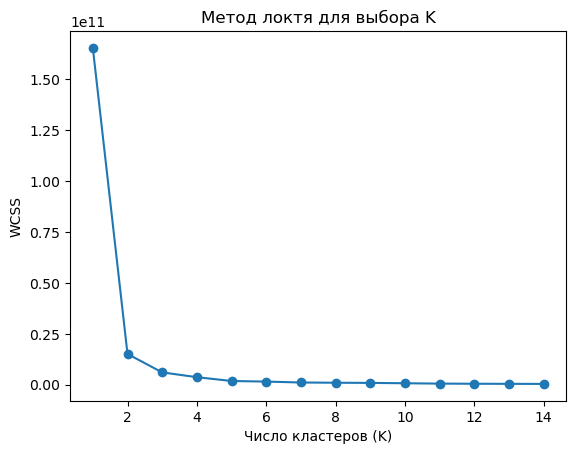

In [58]:
# Создадим вектор признаков
X = features

# Считаем WCSS для разных K
wcss = []
K_values = range(1, 15)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ -- сумма квадратов расстояний точек до центроидов

# Строим график
plt.plot(K_values, wcss, marker='o', linestyle='-')
plt.xlabel("Число кластеров (K)")
plt.ylabel("WCSS")
plt.title("Метод локтя для выбора K")
plt.show()

По графику видно, что оптимально 5 кластеров.
Посчитаем оценку для нашей выборки

In [59]:
for i in [4,5,6]:
    # инициализируем алгоритм с соответствующим количеством кластеров
    kmeans = KMeans(n_clusters=i, random_state=42)

    # обучаем модель и получаем кластеры
    kmeans.fit(X)
    clusters_kmean = kmeans.predict(X)

    # считаем оценку 
    score = silhouette_score(X, clusters_kmean)
    # и выводим ее в консоль
    print(f'Score KMeans for K={i}: {score}')

Score KMeans for K=4: 0.6514774292159856
Score KMeans for K=5: 0.6538192991795325
Score KMeans for K=6: 0.6205837233156125


Лучший результат получен для 5 кластеров.


Для обучения модели DBSCAN нормализуем данные

In [ ]:
std = MinMaxScaler()
X_std = std.fit_transform(features)

Определим оптимальное значение параметра eps

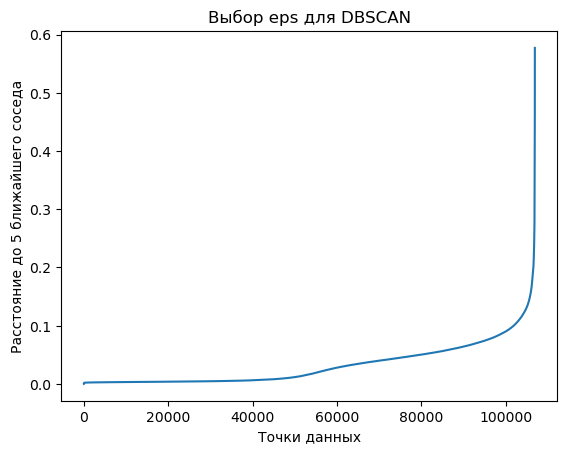

In [61]:
# Ищем расстояния до 5 ближайших соседей
nbrs = NearestNeighbors(n_neighbors=3, n_jobs=10).fit(X_std)
distances, _ = nbrs.kneighbors(X_std)

# Берем 5-е расстояние, сортируем и строим график
distances = np.sort(distances[:, 2])
plt.plot(distances)
plt.xlabel("Точки данных")
plt.ylabel("Расстояние до 5 ближайшего соседа")
plt.title("Выбор eps для DBSCAN")
plt.show()


Судя по графику изгиб происходит примерно на отметке 0,12 - это значение и будем использовать для обучения модели

In [62]:
# инициализируем DBSCAN
dbscan = DBSCAN(eps=0.12, min_samples=3)
# делаем кластеризацию
clusters_dbscan = dbscan.fit_predict(X_std)
# считаем оценку
score_dbscan = silhouette_score(X_std, clusters_dbscan)

print(f'Score DBSCAN: {score_dbscan}')

Score DBSCAN: 0.14011535567649536


Видим, что результат хуже, чем у алгоритма KMean.

Для финального предсказания используем алгоритм KMean

In [ ]:
X = df_cleared.drop(columns=['subject_id'])
# инициализируем модель
model = KMeans(n_clusters=5)

# делаем кластеризацию
clusters = model.fit_predict(X)

# инициализируем конечный датафрейм
df_result = df_cleared
# добавляем колонку с кластерами
df_result['cluster'] = clusters
# добавляем колонку, в которую будем сохранять идентификатор активности
df_result['activityID'] = -1

# справочник соответствия номера кластера и идентификатора активности
dict = {}
# переменная для хранения идентификатора для следующей неизвестной активности
activityID = 1

for index, row in df_result.iterrows():
    if row['cluster'] in dict.keys():
        df_result.loc[index, 'activityID'] = dict[row['cluster']]
    else:
        dict[row['cluster']] = activityID
        df_result.loc[index, 'activityID'] = activityID
        activityID += 1

# Создание файла submission.csv
submission = df_result[['activityID']].reset_index()
submission.columns = ['Index', 'activityID']
submission.to_csv('submission_2.csv', index=False)

Прилагаю скрин
![alt text](image.png)